In [1]:
import numpy
from pandas import read_csv
import pandas as pd
from numpy import arange
import operator
import pandas as pd
import numpy as np
import operator
import sys
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from gensim.models.keyedvectors import KeyedVectors
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import plotly
import plotly.express as px
from pandas import set_option
from numpy import set_printoptions
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install wandb
import wandb
wandb.init(project="visualize-sklearn")

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 181 kB 17.6 MB/s 
     |████████████████████████████████| 144 kB 31.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=317b89dd0cfc09cafaa3facc257ef981ab4e8fc81112dcb008d6227bced738c7
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
binary_vectors = '/content/drive/MyDrive/stock2vec/stock2vec-master/embeddings/stoack2vec_Keyed_Binary.bin'
text_vectors = '/content/drive/MyDrive/stock2vec/stock2vec-master/embeddings/stoack2vec_Keyed_Text.vec'

model = KeyedVectors.load_word2vec_format(text_vectors, binary=False)
word_dict = {}
embeddings = []
symbols = []
for word in model.vocab:
    word_dict[word] = model[word]
    #embeddings.append(model2[word])

for key in word_dict:
    embeddings.append(word_dict[key])
#embeddings
len(word_dict)

505

In [5]:
weights = model.wv.vectors
weights

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([[ 0.24466084, -1.0446645 , -1.2685059 , -0.5117455 ],
       [-0.7107895 ,  0.9343236 , -0.07597128, -1.1681975 ],
       [ 0.06380544, -0.7932712 , -1.0630316 , -0.63787526],
       ...,
       [-0.624028  ,  0.71909416, -0.90465254, -0.03290709],
       [-0.05169835,  0.3635141 , -0.85713726, -0.3418677 ],
       [-0.2460704 ,  0.43191084, -0.8643705 , -0.34102848]],
      dtype=float32)

In [10]:
revenue_data = read_csv('/content/drive/MyDrive/stock2vec/stock2vec-master/data/revenue_data.csv', )
revenue_data.columns

Index(['Unnamed: 0', 'Enterprise.Value', 'EBIT', 'Earnings.before.Tax',
       'Operating.Cash.Flow', 'EBITDA', 'Net.Income.Com', 'Net.Income',
       'Consolidated.Income', 'Free.Cash.Flow', 'Gross.Profit',
       'Income.Tax.Expense', 'Financing.Cash.Flow',
       'Issuance..buybacks..of.shares', 'Dividend.payments',
       'Stock.based.compensation', 'Operating.Expenses',
       'Total.shareholders.equity', 'Revenue', 'Depreciation...Amortization',
       'Feature.1', 'Feature.2', 'Feature.3', 'Feature.4'],
      dtype='object')

In [11]:
revenue_data

,Unnamed: 0,Enterprise.Value,EBIT,Earnings.before.Tax,Operating.Cash.Flow,EBITDA,Net.Income.Com,Net.Income,Consolidated.Income,Free.Cash.Flow,Gross.Profit,Income.Tax.Expense,Financing.Cash.Flow,Issuance..buybacks..of.shares,Dividend.payments,Stock.based.compensation,Operating.Expenses,Total.shareholders.equity,Revenue,Depreciation...Amortization,Feature.1,Feature.2,Feature.3,Feature.4
0,1,2.020508e+10,1.021000e+09,9.460000e+08,1.087000e+09,1.231000e+09,3.160000e+08,3.160000e+08,3.160000e+08,9.110000e+08,2.687000e+09,6.300000e+08,-7.970000e+08,-3.660000e+08,-1.910000e+08,7.000000e+07,1.759000e+09,4.567000e+09,4.914000e+09,2.100000e+08,1.322313,-0.322622,-0.113537,-1.166360
1,2,4.390427e+10,2.940000e+09,1.884000e+09,3.533000e+09,5.099000e+09,1.412000e+09,1.412000e+09,1.412000e+09,9.950000e+08,2.414100e+10,4.720000e+08,-1.672000e+09,-8.370000e+08,-1.860000e+08,8.600000e+07,2.148500e+10,-1.690000e+08,4.454100e+10,2.159000e+09,0.214987,-1.934116,1.691741,0.684100
2,3,1.162704e+10,6.118520e+08,5.552640e+08,8.110280e+08,8.500360e+08,4.238470e+08,4.238470e+08,4.238470e+08,6.192010e+08,4.219413e+09,1.314170e+08,-2.639150e+08,-2.781540e+08,-1.781900e+07,2.776000e+07,3.615138e+09,3.550813e+09,9.580554e+09,2.381840e+08,1.692249,-2.307023,0.887196,0.291138
3,4,1.145830e+12,7.290300e+10,7.290300e+10,7.743400e+10,8.380600e+10,5.953100e+10,5.953100e+10,5.953100e+10,6.412100e+10,1.018390e+11,1.337200e+10,-8.787600e+10,-7.206900e+10,-1.371200e+10,5.340000e+09,3.094100e+10,1.071470e+11,2.655950e+11,1.090300e+10,1.926323,-0.228347,-0.076992,-1.013047
4,5,1.709230e+11,6.341000e+09,5.197000e+09,1.342700e+10,8.106000e+09,5.687000e+09,5.687000e+09,5.687000e+09,1.278900e+10,2.503500e+10,-4.900000e+08,-1.439600e+10,-1.194100e+10,-5.580000e+09,4.210000e+08,1.865200e+10,-8.446000e+09,3.275300e+10,1.765000e+09,1.205433,-0.497232,0.666990,-0.290994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,468,1.400265e+10,6.670000e+08,5.850000e+08,5.860000e+08,9.280000e+08,5.490000e+08,5.490000e+08,5.490000e+08,3.490000e+08,2.026000e+09,3.600000e+07,-4.000000e+07,-5.200000e+07,-1.520000e+08,3.000000e+07,1.372000e+09,2.768000e+09,5.207000e+09,2.610000e+08,-0.029010,-0.025404,0.665244,-0.690417
468,469,3.848678e+10,2.291000e+09,1.839000e+09,1.176000e+09,2.428000e+09,1.542000e+09,1.542000e+09,1.542000e+09,9.420000e+08,2.658000e+09,2.970000e+08,-2.620000e+09,-2.390000e+09,-4.620000e+08,5.000000e+07,3.620000e+08,-7.926000e+09,5.688000e+09,1.370000e+08,1.948260,0.018273,0.097123,-0.907608
469,470,2.955232e+10,1.830000e+07,-2.710000e+08,1.747400e+09,1.058800e+09,-3.792000e+08,-3.792000e+08,-3.793000e+08,1.308400e+09,5.661000e+09,1.082000e+08,-1.302200e+09,1.079000e+08,-1.952000e+08,6.550000e+07,5.627200e+09,1.127130e+10,7.932900e+09,1.040500e+09,0.965519,-0.171960,0.451344,-0.661421
470,471,1.235462e+10,1.143000e+09,1.143000e+09,1.176000e+09,1.336000e+09,8.500000e+08,8.840000e+08,8.840000e+08,1.047000e+09,2.821000e+09,2.590000e+08,1.596000e+09,-6.640000e+08,-2.360000e+08,2.600000e+07,1.678000e+09,7.578000e+09,2.821000e+09,1.930000e+08,0.307103,-0.229762,0.719428,-0.565402


In [12]:
revenue_data.dropna(inplace=True)

In [13]:
revenue_data.shape

(472, 24)

In [14]:
revenue_data.pop("Unnamed: 0")
target = revenue_data.pop("Revenue.Growth")
revenue_data.shape

KeyError: ignored

In [ ]:
revenue_data.head()

,Market.Cap,returnOnAssets,debtRatio,Revenue.per.Share,cashPerShare,Feature.1,Feature.2,Feature.3,Feature.4
0,2.065308e+10,0.0903,0.2106,15.3084,7.0000,1.322313,-0.322622,-0.113537,-1.166360
1,1.478927e+10,0.0418,0.5617,96.7060,0.9314,0.214987,-1.934116,1.691741,0.684100
2,1.147784e+10,0.1189,0.1157,129.9446,12.1599,1.692249,-2.307023,0.887196,0.291138
3,1.097650e+12,1.0497,0.3130,53.5973,5.2293,1.926323,-0.228347,-0.076992,-1.013047
4,1.386740e+11,2.1966,0.6792,21.2544,4.7300,1.205433,-0.497232,0.666990,-0.290994


In [ ]:
revenue_data = revenue_data.iloc[:,0:5]

In [ ]:
revenue_data

,Market.Cap,returnOnAssets,debtRatio,Revenue.per.Share,cashPerShare,Feature.1,Feature.2,Feature.3,Feature.4
0,2.065308e+10,0.0903,0.2106,15.3084,7.0000,1.322313,-0.322622,-0.113537,-1.166360
1,1.478927e+10,0.0418,0.5617,96.7060,0.9314,0.214987,-1.934116,1.691741,0.684100
2,1.147784e+10,0.1189,0.1157,129.9446,12.1599,1.692249,-2.307023,0.887196,0.291138
3,1.097650e+12,1.0497,0.3130,53.5973,5.2293,1.926323,-0.228347,-0.076992,-1.013047
4,1.386740e+11,2.1966,0.6792,21.2544,4.7300,1.205433,-0.497232,0.666990,-0.290994
...,...,...,...,...,...,...,...,...,...
466,4.708466e+09,0.1514,0.3516,41.2535,4.5492,0.056890,-0.089811,0.889022,-0.398401
467,1.199065e+10,0.4034,0.3196,28.9600,1.6463,-0.029010,-0.025404,0.665244,-0.690417
468,2.870678e+10,1.3491,2.4387,18.2132,0.9350,1.948260,0.018273,0.097123,-0.907608
469,2.115642e+10,-0.0943,0.3705,38.9823,2.6673,0.965519,-0.171960,0.451344,-0.661421


In [ ]:
target

0      0.0988
1      0.0450
2      0.0221
3      0.1586
4      0.1608
        ...  
466   -0.0424
467    0.1062
468   -0.0323
469    0.0166
471    0.0976
Name: Revenue.Growth, Length: 387, dtype: float64

In [ ]:
dataset = revenue_data

In [ ]:
dataset.head()

,Market.Cap,returnOnAssets,debtRatio,Revenue.per.Share,cashPerShare,Feature.1,Feature.2,Feature.3,Feature.4
0,2.065308e+10,0.0903,0.2106,15.3084,7.0000,1.322313,-0.322622,-0.113537,-1.166360
1,1.478927e+10,0.0418,0.5617,96.7060,0.9314,0.214987,-1.934116,1.691741,0.684100
2,1.147784e+10,0.1189,0.1157,129.9446,12.1599,1.692249,-2.307023,0.887196,0.291138
3,1.097650e+12,1.0497,0.3130,53.5973,5.2293,1.926323,-0.228347,-0.076992,-1.013047
4,1.386740e+11,2.1966,0.6792,21.2544,4.7300,1.205433,-0.497232,0.666990,-0.290994


In [ ]:
set_option('precision', 4)
print(dataset.describe())

             EBIT  Operating.Cash.Flow  Operating.Income      EBITDA  \
count  4.7200e+02           4.7200e+02        4.7200e+02  4.7200e+02   
mean   3.4131e+09           4.2781e+09        3.3233e+09  4.7907e+09   
std    6.5469e+09           7.6890e+09        6.4396e+09  8.5045e+09   
min   -1.6713e+10          -4.7840e+09       -1.4557e+10 -8.9920e+09   
25%    7.4126e+08           9.5208e+08        7.5144e+08  1.1158e+09   
50%    1.6455e+09           1.8179e+09        1.5166e+09  2.3390e+09   
75%    3.3645e+09           3.9665e+09        3.3263e+09  4.7597e+09   
max    7.2903e+10           7.7434e+10        7.0898e+10  8.3806e+10   

       Free.Cash.Flow  Gross.Profit  Net.Income.Com  Consolidated.Income  \
count      4.7200e+02    4.7200e+02      4.7200e+02           4.7200e+02   
mean       2.8447e+09    9.9160e+09      2.3960e+09           2.4540e+09   
std        5.7263e+09    1.6905e+10      5.1837e+09           5.2530e+09   
min       -5.6260e+09    2.0677e+08     -2.2802

In [ ]:
# correlation
set_option('precision', 4)
print(dataset.corr(method='pearson'))

                                 EBIT  Earnings.before.Tax  \
EBIT                           1.0000               0.9950   
Earnings.before.Tax            0.9950               1.0000   
Operating.Cash.Flow            0.9197               0.9022   
EBITDA                         0.9697               0.9486   
Net.Income.Com                 0.9686               0.9760   
Net.Income                     0.9693               0.9763   
Consolidated.Income            0.9699               0.9763   
Free.Cash.Flow                 0.8913               0.8872   
Gross.Profit                   0.8395               0.8121   
Income.Tax.Expense             0.7558               0.7524   
Financing.Cash.Flow           -0.3474              -0.3371   
Issuance..buybacks..of.shares -0.7469              -0.7576   
Dividend.payments             -0.7661              -0.7353   
Stock.based.compensation       0.6203               0.6305   
Operating.Expenses             0.6555               0.6178   
Total.sh

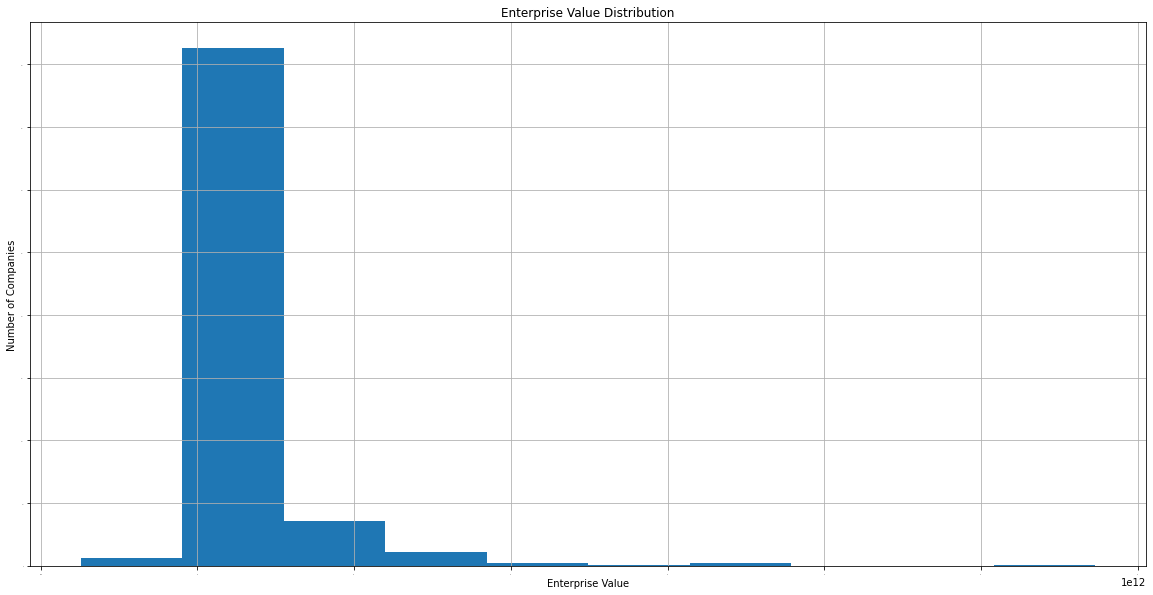

In [ ]:
plt.rc('figure', figsize=(20,10))
#target.hist(xlabelsize=1, ylabelsize=1)
target2 = np.expm1((target + abs(target.min())) / 200)
target2 = np.log1p(target2)
target.hist(xlabelsize=1, ylabelsize=1)
pyplot.title('Enterprise Value Distribution')
pyplot.xlabel('Enterprise Value')
pyplot.ylabel('Number of Companies')
pyplot.show()

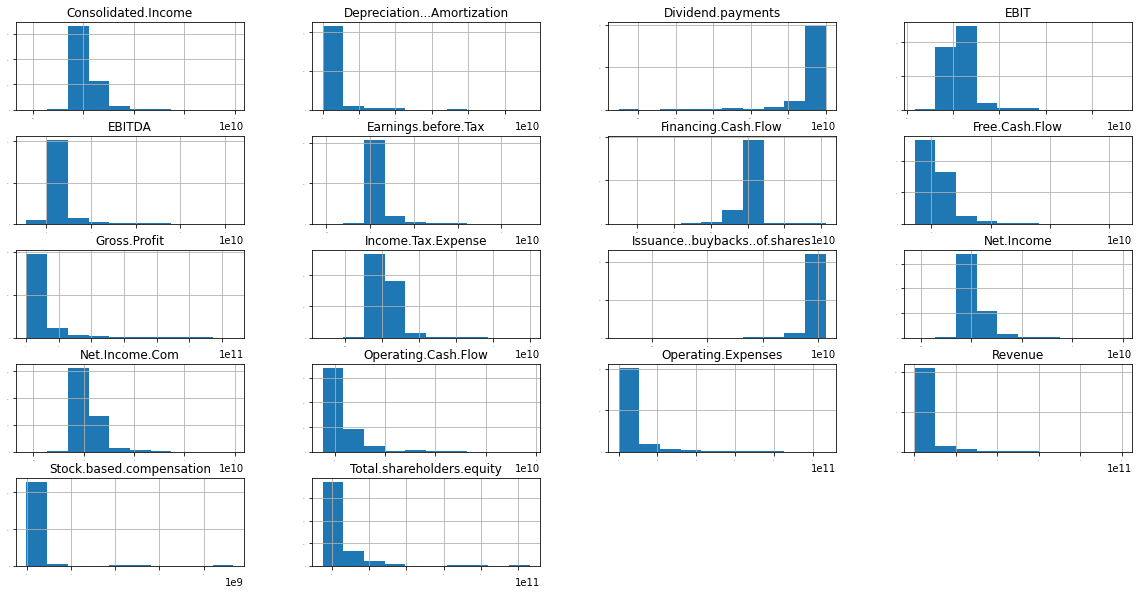

In [ ]:
set_printoptions(precision=3)
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

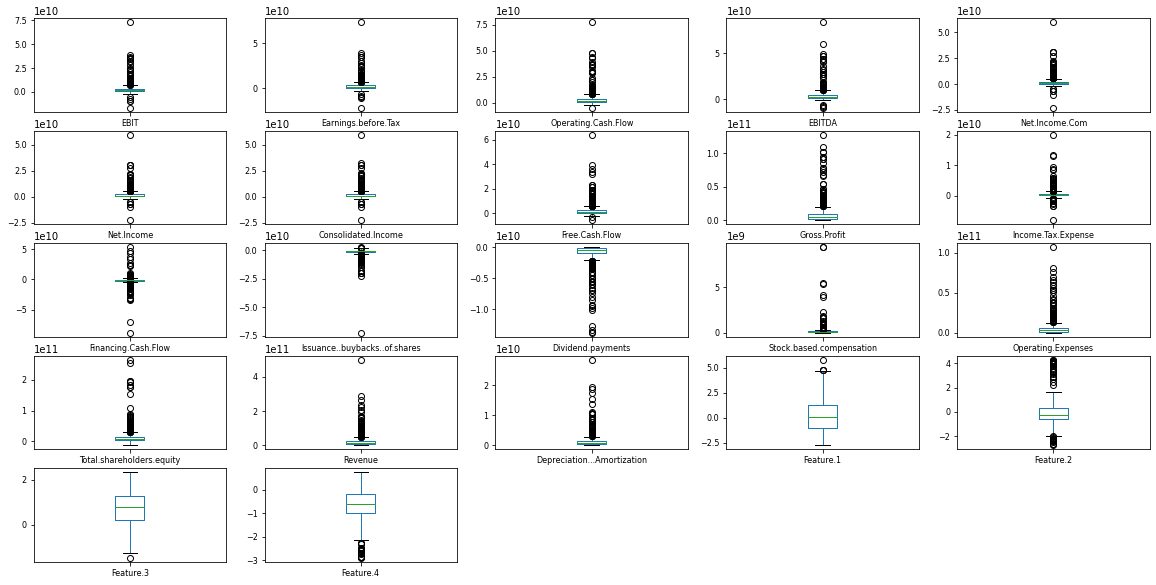

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

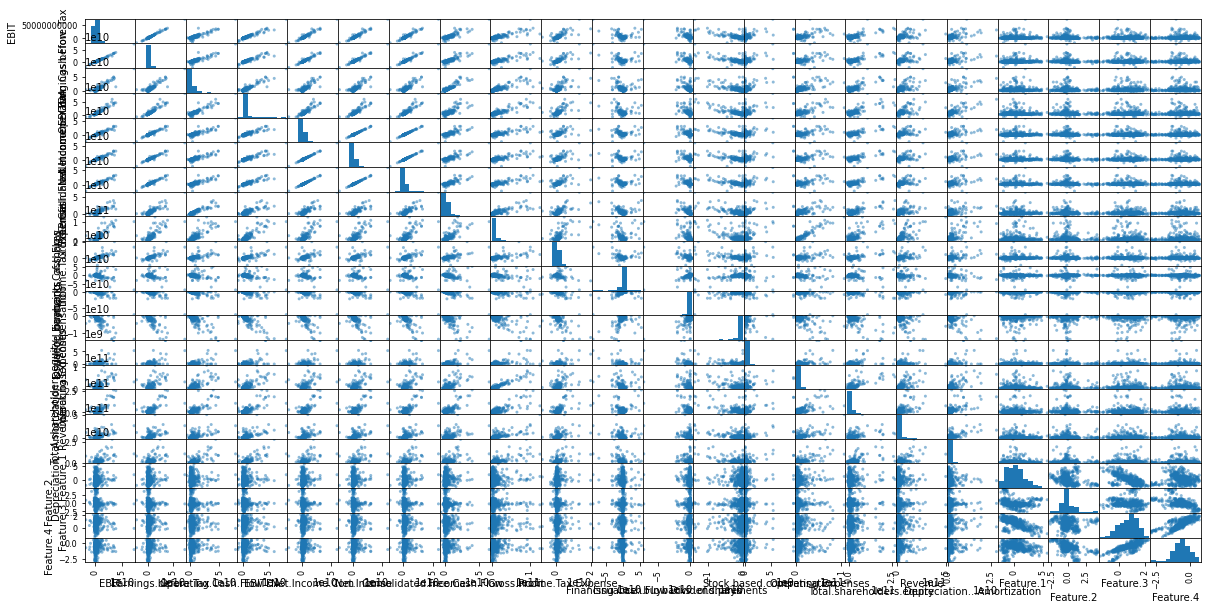

In [ ]:
scatter_matrix(dataset)
pyplot.show()

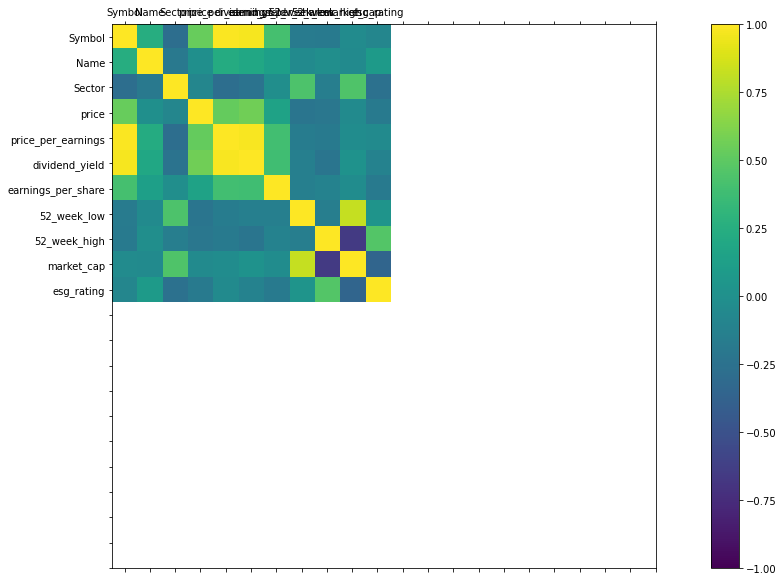

In [ ]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,22,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()

In [ ]:
# Split-out validation dataset
array = dataset.values
X = array
Y = target
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [ ]:
dataset.shape

(387, 9)

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Revenue.Growth   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.025
Date:                Thu, 28 Jan 2021   Prob (F-statistic):             0.0356
Time:                        21:08:08   Log-Likelihood:                 212.34
No. Observations:                 387   AIC:                            -404.7
Df Residuals:                     377   BIC:                            -365.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.208      0.011      0.9

In [ ]:
num_folds = 10
seed = 7
#scoring = 'neg_mean_squared_error'
#scoring = 'neg_mean_squared_log_error'
#scoring = 'explained_variance'
scoring = 'r2'

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0990751990842712e+23, tolerance: 2.227925318535718e+20
  model = cd_fast.enet_coordinate_descent(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/

LR: 0.092424 (1.386771)
LASSO: 0.108283 (1.395795)
EN: 0.111452 (1.397855)
KNN: 0.289241 (0.701166)
CART: -0.049439 (1.397468)
SVR: -0.134015 (0.099923)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


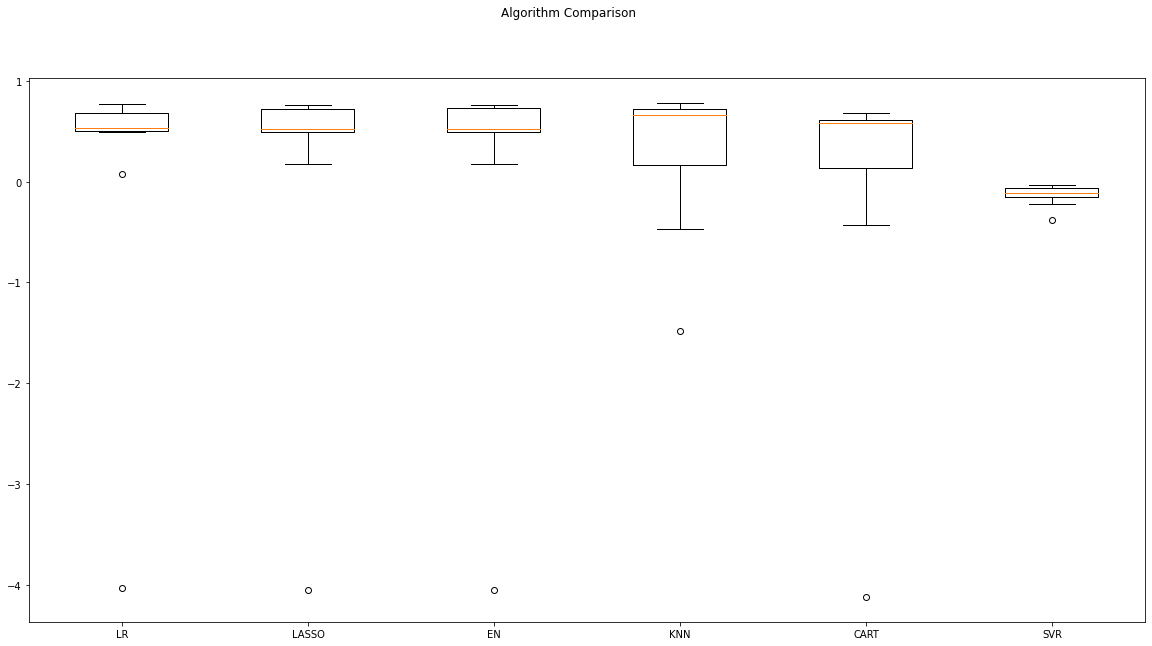

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.099075135362062e+23, tolerance: 2.227925318535718e+20
  model = cd_fast.enet_coordinate_descent(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_

ScaledLR: 0.092424 (1.386771)
ScaledLASSO: 0.108283 (1.395795)
ScaledEN: 0.160042 (1.286825)
ScaledKNN: 0.409888 (0.627550)
ScaledCART: 0.101820 (1.389372)
ScaledSVR: -0.134015 (0.099923)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


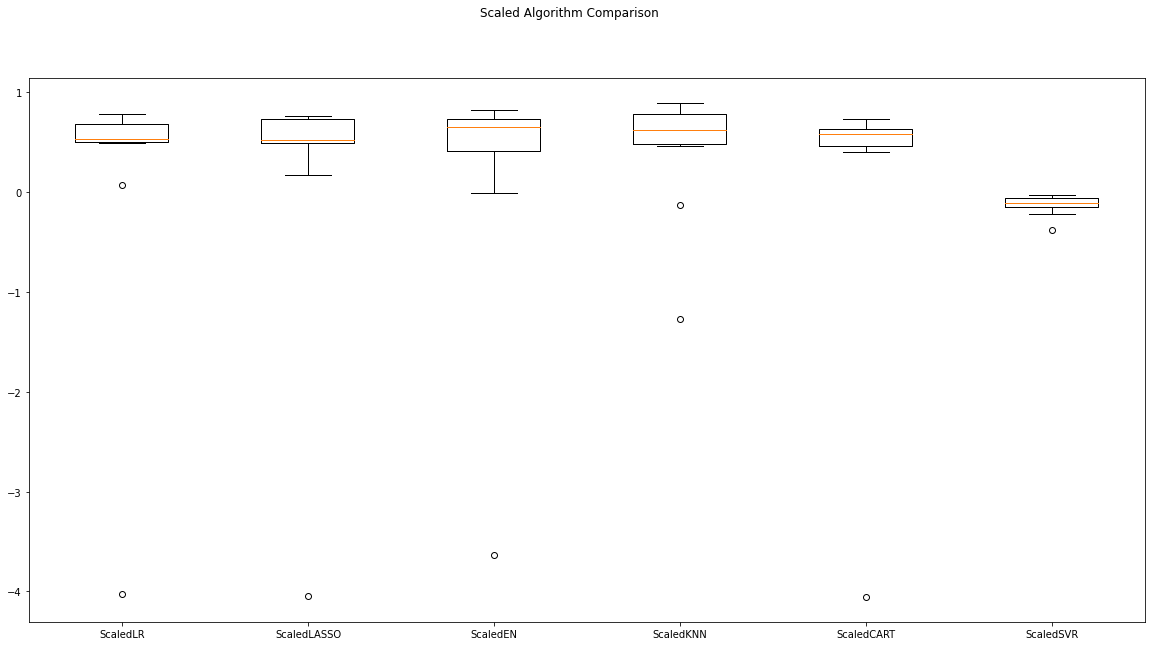

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# SVR Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
#param_grid = dict(n_neighbors=k_values)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilon}
model = SVR(kernel='rbf')
#model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.134015 using {'C': 10, 'epsilon': 0, 'gamma': 0.1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.001}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.01}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0, 'gamma': 1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.001}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.01}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.001}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.01}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.5, 'gamma': 0.001}
-0.134015 (0.099923) with: {'

In [ ]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
ensembles.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledAB: 0.134044 (1.151389)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledGBM: 0.500721 (0.497474)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledRF: 0.406822 (0.705828)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledET: 0.432379 (0.716372)
ScaledSVR: -0.134015 (0.099923)
ScaledKNN: 0.409888 (0.627550)


/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


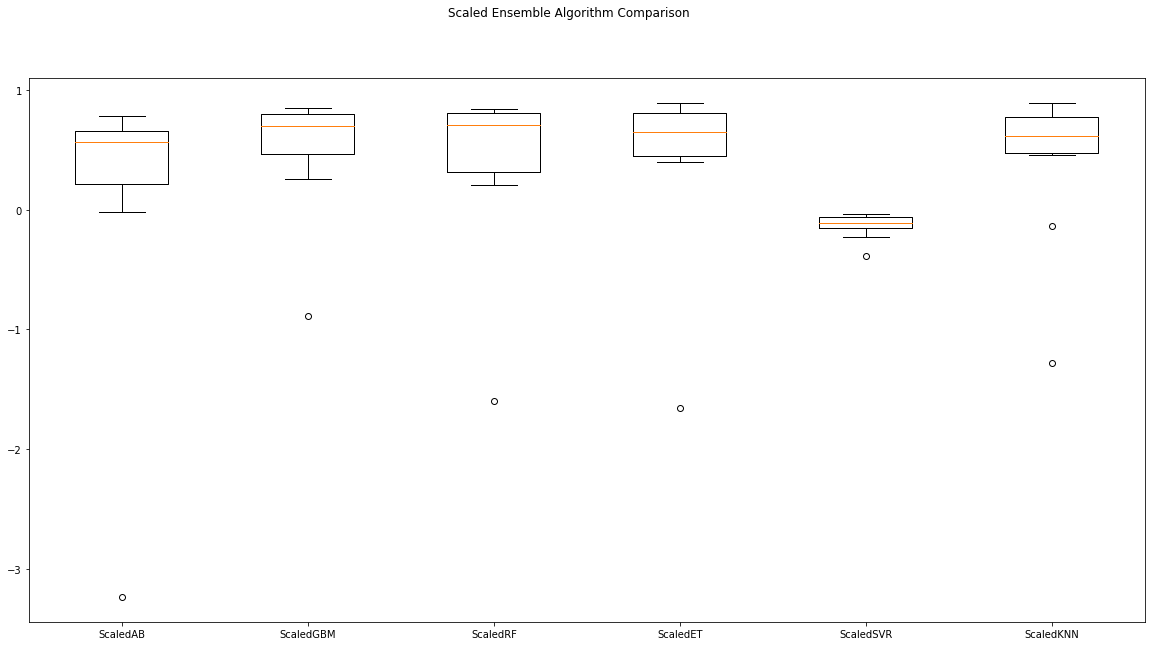

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Tune scaled RandomForestRegressor

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.396616 using {'n_estimators': 300}
0.374076 (0.726463) with: {'n_estimators': 50}
0.390700 (0.714934) with: {'n_estimators': 100}
0.385292 (0.771119) with: {'n_estimators': 150}
0.386002 (0.778039) with: {'n_estimators': 200}
0.392151 (0.755550) with: {'n_estimators': 250}
0.396616 (0.748985) with: {'n_estimators': 300}
0.390979 (0.765044) with: {'n_estimators': 350}
0.392737 (0.761597) with: {'n_estimators': 400}


## Tune scaled KNeighborsRegressor

In [ ]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
#model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.497398 using {'n_neighbors': 9}
0.045362 (1.240722) with: {'n_neighbors': 1}
0.306285 (0.865625) with: {'n_neighbors': 3}
0.403054 (0.626746) with: {'n_neighbors': 5}
0.465354 (0.571477) with: {'n_neighbors': 7}
0.497398 (0.493948) with: {'n_neighbors': 9}
0.484866 (0.534707) with: {'n_neighbors': 11}
0.473227 (0.557304) with: {'n_neighbors': 13}
0.494611 (0.499321) with: {'n_neighbors': 15}
0.493871 (0.482183) with: {'n_neighbors': 17}
0.497099 (0.456303) with: {'n_neighbors': 19}
0.492206 (0.429613) with: {'n_neighbors': 21}


## Tune scaled SVR Algorithm

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
#param_grid = dict(n_neighbors=k_values)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilon}
model = SVR(kernel='rbf')
#model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.134015 using {'C': 10, 'epsilon': 0, 'gamma': 0.1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.001}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.01}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0, 'gamma': 0.1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0, 'gamma': 1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.001}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.01}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 0.1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.01, 'gamma': 1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.001}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.01}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 0.1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.1, 'gamma': 1}
-0.134015 (0.099923) with: {'C': 0.001, 'epsilon': 0.5, 'gamma': 0.001}
-0.134015 (0.099923) with: {'

##  Tune scaled GBM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.479033 using {'n_estimators': 100}
0.478642 (0.531844) with: {'n_estimators': 50}
0.479033 (0.537577) with: {'n_estimators': 100}
0.464607 (0.559628) with: {'n_estimators': 150}
0.460915 (0.562737) with: {'n_estimators': 200}
0.457491 (0.564630) with: {'n_estimators': 250}
0.455266 (0.563695) with: {'n_estimators': 300}
0.453839 (0.565108) with: {'n_estimators': 350}
0.452894 (0.565481) with: {'n_estimators': 400}


## Tune scaled AdaBoostRegressor

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.301429 using {'n_estimators': 50}
0.301429 (0.648091) with: {'n_estimators': 50}
0.203885 (0.810100) with: {'n_estimators': 100}
0.189783 (0.826959) with: {'n_estimators': 150}
0.213274 (0.852343) with: {'n_estimators': 200}
0.219998 (0.838179) with: {'n_estimators': 250}
0.209761 (0.838654) with: {'n_estimators': 300}
0.205861 (0.832224) with: {'n_estimators': 350}
0.205439 (0.832911) with: {'n_estimators': 400}


# Preparing the Model

In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=19)
model.fit(rescaledX, Y_train)

KNeighborsRegressor(n_neighbors=19)

In [ ]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

0.14742677832669493


In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

RandomForestRegressor(random_state=7)

In [ ]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

-0.5483343592048384


In [ ]:
#Best: -0.093469 using {'C': 10, 'epsilon': 2, 'gamma': 0.1}
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVR(C=10, epsilon=2, gamma=0.1)
model.fit(rescaledX, Y_train)

SVR(C=10, epsilon=2, gamma=0.1)

In [ ]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
print(explained_variance_score(Y_validation, predictions))
#print(r2_score(Y_validation, predictions))

0.1613409511977515


In [ ]:
model.score(X_validation, Y_validation)

-0.00026514740336147646

In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=50)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=50, random_state=7)

In [ ]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

-2.054505551627879


In [ ]:
# prepare the model AdaBoostRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostRegressor(random_state=seed, n_estimators=150)
model.fit(rescaledX, Y_train)

AdaBoostRegressor(n_estimators=150, random_state=7)

In [ ]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
#print(mean_squared_log_error(Y_validation, predictions))
#print(explained_variance_score(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

0.1511742222821688


In [ ]:
predictions.tolist()

[19.733211931016882,
 19.370804400494947,
 20.461622732465067,
 21.402099425003076,
 21.374804006199252,
 25.504385191400452,
 20.70900548257857,
 21.983375696113896,
 20.4738070925399,
 23.31919212291384,
 16.9183872690382,
 25.187126318635954,
 22.103001943132004,
 19.916399490488672,
 20.79007719739965,
 20.27973715328319,
 24.842887296821473,
 26.605314580230445,
 23.922800616971834,
 19.6569358503046,
 30.44300088053096,
 23.399203865295345,
 23.13540366770524,
 20.018089050827207,
 21.138463627983004,
 24.87478910323023,
 21.346657269350384,
 22.97794190315001,
 23.574390000865254,
 40.2053936948964,
 25.628100180378304,
 15.087471086553121,
 25.249078242999328,
 20.717113110983696,
 20.21851184832807,
 19.23813203157444,
 20.303658921140954,
 25.416581297614993,
 20.18309066163728,
 22.521666447311315,
 20.103516615487514,
 29.081333701141283,
 22.594426510699854,
 18.72482537843741,
 19.10491724805469,
 25.973316754771524,
 22.438088957547215,
 21.36338872238175,
 21.6365304804

In [ ]:
print(Y_validation.values.tolist())

[17.0, 34.2, 37.2, 20.5, 16.2, 20.0, 19.8, 13.6, 14.4, 30.8, 31.9, 19.4, 18.0, 32.2, 24.5, 24.8, 19.2, 31.4, 24.4, 23.5, 23.0, 26.3, 19.7, 15.4, 16.2, 21.9, 20.6, 33.4, 28.1, 48.4, 13.5, 26.7, 16.1, 29.7, 18.5, 21.7, 20.0, 20.6, 17.7, 18.2, 13.5, 35.1, 30.8, 12.9, 23.3, 30.6, 33.9, 12.2, 31.9, 34.4, 14.5, 13.0, 22.3, 26.3, 25.2, 33.2, 27.0, 24.4, 32.9, 35.0, 11.5, 13.6, 29.8, 25.4, 25.8, 27.6, 45.9, 37.0, 37.7, 20.1, 13.1, 22.8, 24.5, 41.3, 22.6, 26.6, 15.8, 28.3, 11.2, 32.8, 35.1, 29.1, 21.4, 15.4, 26.9, 31.0, 23.1, 35.4, 12.9, 25.1, 26.6, 17.0, 22.0]


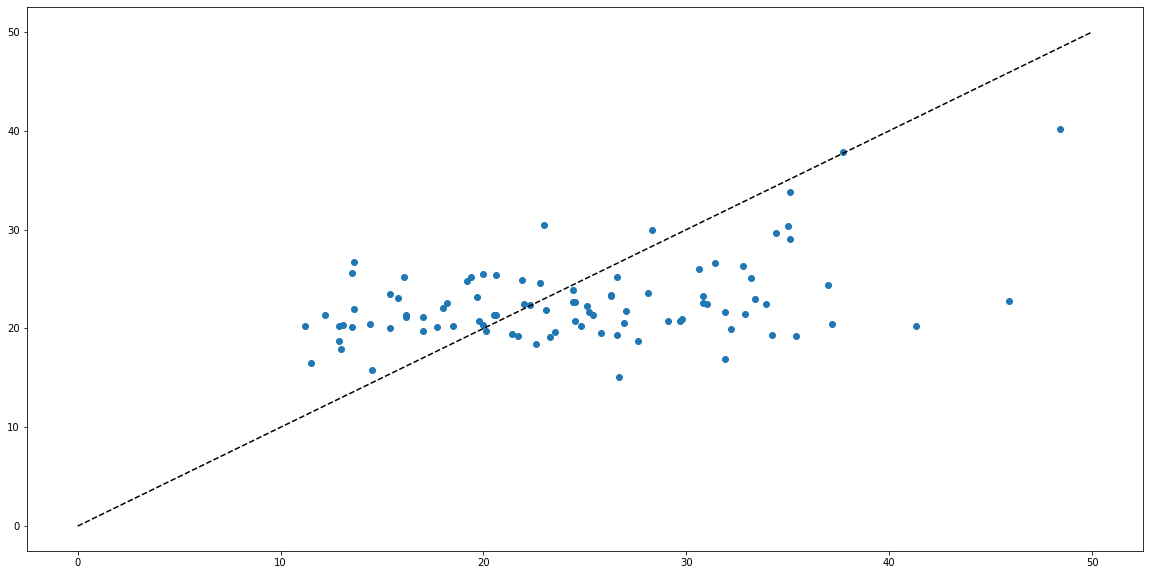

In [ ]:
plt.scatter(Y_validation.values.tolist(), predictions.tolist())
plt.plot([0, 50], [0, 50], '--k')

In [ ]:
wandb.sklearn.plot_outlier_candidates(model, X_train, predictions)

ValueError: Found input variables with inconsistent numbers of samples: [368, 93]

In [ ]:
dataset

,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4
0,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,0.304746,-1.149245,-0.353319,-2.837031
1,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,-0.213970,-0.436910,-1.272887,-0.784875
2,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,0.129664,-1.113122,-0.635674,-1.020973
3,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,0.180174,-1.167327,-0.749103,1.010242
4,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,0.228507,-0.474911,-0.782801,-2.162982
...,...,...,...,...,...,...,...,...,...,...,...
500,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,0.174004,-0.218977,-1.022924,-0.648829
501,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,0.234933,-1.126480,-0.557401,-0.695120
502,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,-0.046591,-1.136583,-0.795957,-1.041455
503,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,-0.640305,1.766778,-2.796835,-0.085380


In [ ]:
#columns_fi = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share', '52_week_low', '52_week_high', 'market_cap', 'esg_rating']
esg2 = dataset
esg2["esg_rating"] = target
esg2.head()

<ipython-input-40-2e1bb36fe7be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esg2["esg_rating"] = target


,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4,esg_rating
0,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,0.304746,-1.149245,-0.353319,-2.837031,34.9
1,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,-0.213970,-0.436910,-1.272887,-0.784875,32.6
2,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,0.129664,-1.113122,-0.635674,-1.020973,29.8
3,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,0.180174,-1.167327,-0.749103,1.010242,29.1
4,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,0.228507,-0.474911,-0.782801,-2.162982,11.3


In [ ]:
esg2.shape

(461, 12)

In [ ]:
df_train, df_test = train_test_split(esg2, test_size=0.20)

X_train_fi, y_train_fi = df_train.drop('esg_rating',axis=1), df_train['esg_rating']
X_test_fi, y_test_fi = df_test.drop('esg_rating',axis=1), df_test['esg_rating']
esg_model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
#esg_model = SVR(C=10, epsilon=2, gamma=0.1)
esg_model.fit(X_train_fi, y_train_fi)

RandomForestRegressor(n_jobs=-1)

In [ ]:
#!pip install rfpimp
import rfpimp
imp = rfpimp.importances(esg_model, X_test_fi, y_test_fi)

/Users/tmedeiros/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


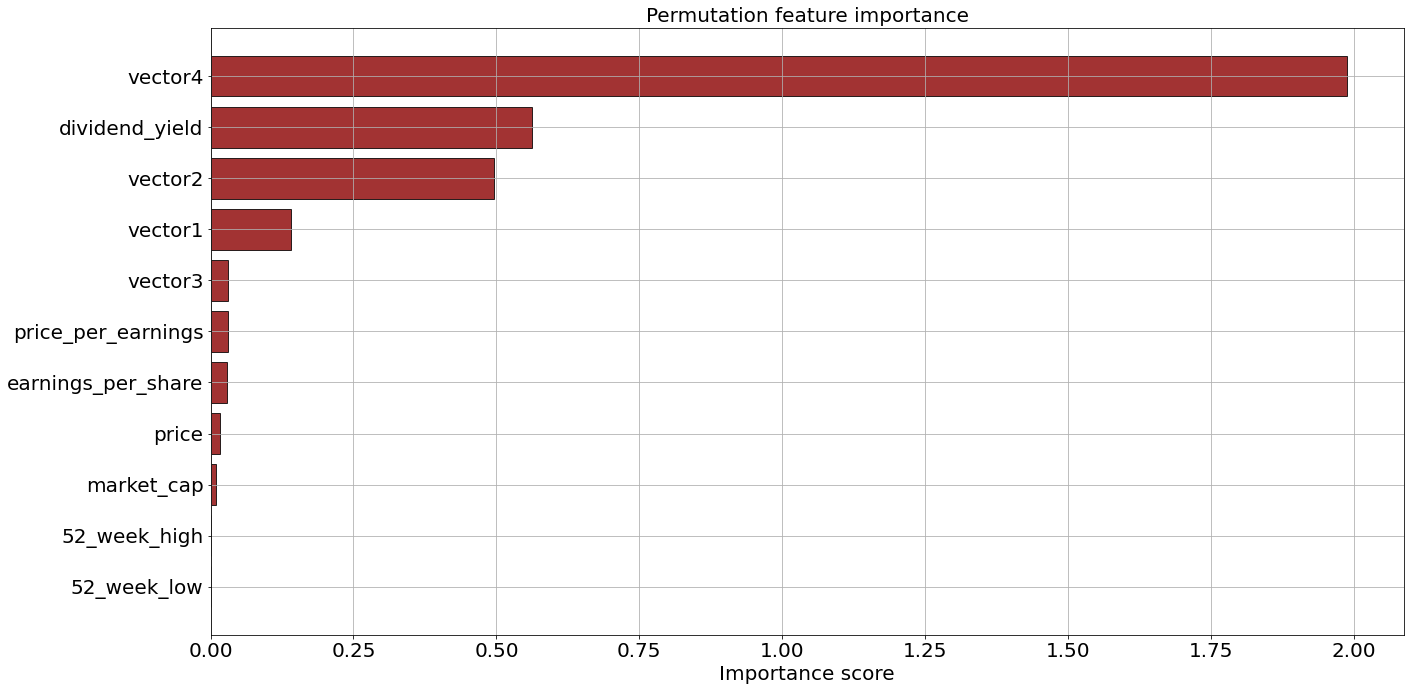

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='darkred', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.9)
plt.grid(b=None)
plt.gca().invert_yaxis()

fig.tight_layout()

In [ ]:
df_train, df_test = train_test_split(esg2, test_size=0.20)

X_train_fi, y_train_fi = df_train.drop('esg_rating',axis=1), df_train['esg_rating']
X_test_fi, y_test_fi = df_test.drop('esg_rating',axis=1), df_test['esg_rating']
#esg_model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
esg_model = SVR(C=10, epsilon=2, gamma=0.1)
esg_model.fit(X_train_fi, y_train_fi)

SVR(C=10, epsilon=2, gamma=0.1)

In [ ]:
X_test_fi

,Symbol,Name,Sector,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4
305,MET,MetLife Inc.,Financials,44.28,8.52,3.4587,0.63,56.580,44.5800,4.8679e+10,-0.4392,1.0392,-2.1823,-1.0970
479,VMC,Vulcan Materials,Materials,121.47,40.90,0.7798,3.10,141.200,108.9500,1.6964e+10,0.6091,0.2847,-1.0880,1.2443
394,RSG,Republic Services Inc,Industrials,62.72,26.13,2.1362,1.77,69.400,57.5300,2.1591e+10,0.7209,-1.0128,-0.0992,-1.9843
326,NFLX,Netflix Inc.,Information Technology,250.10,200.08,0.0000,1.25,286.810,138.2600,1.1480e+11,0.2023,-0.0471,-1.4734,2.6663
60,ADP,Automatic Data Processing,Information Technology,108.25,29.34,2.2191,3.85,125.240,95.5000,5.0338e+10,0.1372,-1.1860,-0.5288,-2.2191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.2183,6.19,169.550,78.8100,8.1236e+09,0.9275,-0.0713,-0.5302,0.5656
142,DAL,Delta Air Lines Inc.,Industrials,51.23,10.37,2.2656,4.94,60.790,43.8100,3.8394e+10,-0.6820,-0.8059,-1.8564,2.4306
419,SWK,Stanley Black & Decker,Consumer Discretionary,152.86,20.57,1.5776,8.05,176.620,121.0900,2.4496e+10,0.0720,-0.2847,-1.0316,-1.9108
188,FAST,Fastenal Co,Industrials,52.15,27.02,2.7799,2.01,57.815,39.7900,1.5311e+10,0.2927,0.0770,-1.1228,-0.1449


In [ ]:
esg2_columns = ['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share',
       '52_week_low', '52_week_high', 'market_cap', 'vector1', 'vector2',
       'vector3', 'vector4', 'esg_rating']
esg2 = esg[['price', 'price_per_earnings', 'dividend_yield', 'earnings_per_share',
       '52_week_low', '52_week_high', 'market_cap', 'vector1', 'vector2',
       'vector3', 'vector4', 'esg_rating']]
print(esg2.shape)
esg2.head()

(461, 12)


,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4,esg_rating
0,222.89,24.31,2.3329,7.92,259.77,175.490,1.3872e+11,0.3047,-1.1492,-0.3533,-2.8370,34.9
1,60.24,27.76,1.1480,1.70,68.39,48.925,1.0783e+10,-0.2140,-0.4369,-1.2729,-0.7849,32.6
2,56.27,22.51,1.9090,0.26,64.60,42.280,1.0212e+11,0.1297,-1.1131,-0.6357,-1.0210,29.8
3,108.48,19.41,2.4996,3.29,125.86,60.050,1.8139e+11,0.1802,-1.1673,-0.7491,1.0102,29.1
4,150.51,25.47,1.7145,5.44,162.60,114.820,9.8766e+10,0.2285,-0.4749,-0.7828,-2.1630,11.3


In [ ]:
features = ['vector1']
features2 = ['earnings_per_share']
target = 'esg_rating'
X2 = esg2[features].values.reshape(-1, len(features))
X3 = esg2[features2].values.reshape(-1, len(features2))
Y2 = esg2[target].values

x_pred = np.linspace(0, 40, 200).reshape(-1, len(features)) # prediction line
x_pred3 = np.linspace(0, 40, 200).reshape(-1, len(features2)) # prediction line

In [ ]:
from sklearn import linear_model

ols_1 = linear_model.LinearRegression()
model_1 = ols_1.fit(X2, Y2)
response_1 = model_1.predict(x_pred)

In [ ]:
model_2 = ols_1.fit(X3, Y2)
response_2 = model_2.predict(x_pred3)

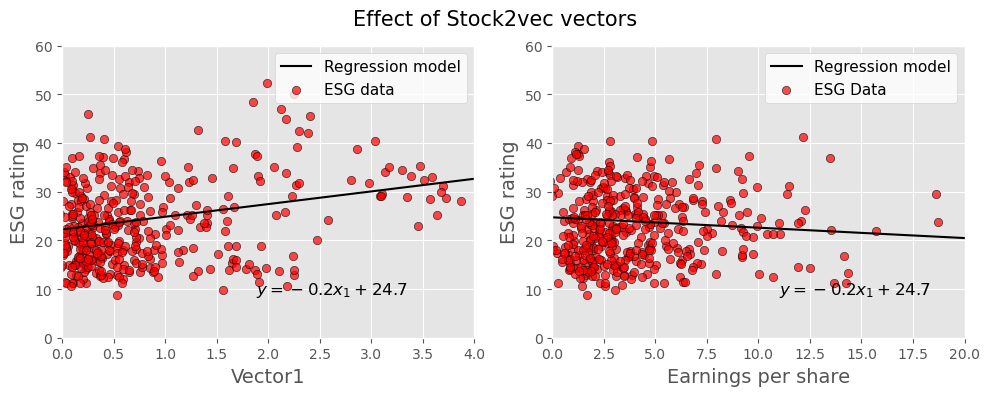

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Effect of Stock2vec vectors', fontsize=15)

axes[0].plot(x_pred, response_1, color='k', label='Regression model')
axes[0].scatter(X2, Y2, edgecolor='k', facecolor='red', alpha=0.7, label='ESG data')
axes[0].set_ylabel('ESG rating', fontsize=14)
axes[0].set_xlabel('Vector1', fontsize=14)
axes[0].legend(facecolor='white', fontsize=11, loc='best')
axes[0].set_ylim(0, 60)
axes[0].set_xlim(0, 4)
axes[0].text(0.47, 0.15, '$y = %.1f x_1 + %.1f $' % (model_1.coef_[0], model_1.intercept_),
             fontsize=12, transform=axes[0].transAxes)
axes[0].text(0.77, 0.3, '', fontsize=10, ha='center', va='center',
         transform=axes[0].transAxes, color='red', alpha=0.5)

axes[1].plot(x_pred3, response_2, color='k', label='Regression model')
axes[1].scatter(X3, Y2, edgecolor='k', facecolor='red', alpha=0.7, label='ESG Data')
axes[1].set_ylabel('ESG rating', fontsize=14)
axes[1].set_xlabel('Earnings per share', fontsize=14)
axes[1].legend(facecolor='white', fontsize=11, loc='best')
axes[1].set_ylim(0, 60)
axes[1].set_xlim(0, 20)
axes[1].text(0.55, 0.15, '$y = %.1f x_1 + %.1f $' % (model_2.coef_[0], model_2.intercept_),
             fontsize=12, transform=axes[1].transAxes)
axes[1].text(0.77, 0.3, '', fontsize=10, ha='center', va='center',
         transform=axes[1].transAxes, color='red', alpha=0.5)

fig.tight_layout(rect=[0, 0, 1, 0.94])

In [ ]:
esg_model.feature_importances_

array([0.033, 0.057, 0.09 , 0.067, 0.021, 0.036, 0.037, 0.099, 0.255,
       0.063, 0.242])

In [ ]:
dataset

,price,price_per_earnings,dividend_yield,earnings_per_share,52_week_low,52_week_high,market_cap,vector1,vector2,vector3,vector4
0,222.89,24.31,2.3329,7.92,259.77,175.490,1.3872e+11,0.3047,-1.1492,-0.3533,-2.8370
1,60.24,27.76,1.1480,1.70,68.39,48.925,1.0783e+10,-0.2140,-0.4369,-1.2729,-0.7849
2,56.27,22.51,1.9090,0.26,64.60,42.280,1.0212e+11,0.1297,-1.1131,-0.6357,-1.0210
3,108.48,19.41,2.4996,3.29,125.86,60.050,1.8139e+11,0.1802,-1.1673,-0.7491,1.0102
4,150.51,25.47,1.7145,5.44,162.60,114.820,9.8766e+10,0.2285,-0.4749,-0.7828,-2.1630
...,...,...,...,...,...,...,...,...,...,...,...
500,70.24,30.94,1.1701,1.83,76.81,46.860,1.2915e+10,0.1740,-0.2190,-1.0229,-0.6488
501,76.30,27.25,1.7971,4.07,86.93,62.850,2.7003e+10,0.2349,-1.1265,-0.5574,-0.6951
502,115.53,14.32,0.7948,9.01,133.49,108.170,2.4455e+10,-0.0466,-1.1366,-0.7960,-1.0415
503,50.71,17.73,1.4809,2.60,55.61,38.430,1.0671e+10,-0.6403,1.7668,-2.7968,-0.0854
